# Solving Conductive Heat Transfer: Case of a window, with and without an insulating aire layer

In this training we wish to solve the 1D  conductive heat transfer problem. We will consider heat transfer in a 1D slab of material It could be a glass window for example.. The medium has a width L and a thermal conductivity K and a specific heat Cp and density $\rho$. 



The 1D heat diffusion equations reads :
    $\frac{\partial T}{\partial t}-\frac{K}{\rho Cp}\frac{\partial^2 T}{\partial x^2}=\frac{SK}{\rho Cp}$

where S is an energy source term (in $w/m^2$) that is non-zero if we inject energy in the system. For the moment we will assume that S=0

For glass, $K\simeq 1 w/m/K$, Cp=753 J/Kg/K, $\rho=2500 Kg/m^3$

## Diffusion timescale and the Courant condition (CFL)

We assume initially that the glass width is L =1 cm, and that the temperature everywhere is 300K initially. The right (x=0) and left (x=L) temperatures of the glass is $T_L$ and $T_R$. We will change the glass left and right temperatures and see how the temperature profile (T(x) for x ranging from 0 to L) evolves.

By doing a simple dimensional analysis, find a characteristic timescale $T_d$ using L (the width of the window),  $T_d$ as a functio of L, K, $\rho$ $Cp$. $T_d$ is the diffusion timescale. We can also recognize that $D=K/\rho C_p$ is a diffusion coefficient, so the classical theory for diffusion processes applies here... 

$T_d=\frac{L^2}{D}$

In [371]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
L = 1e-2
Cp= 753
K = 1
rho = 2500
T_0 = 300
D = K/(rho*Cp)
T_d = L**2/D


print("T_d =",T_d)

T_d = 188.25


## Discretization of the problem

Now we want to solve the diffusion equation using a finite difference method.
We need first to write the integration scheme.
we call $x_i=i*dx$, $t_j=j*dt$ with i,j, integers, and dt and dx standing for the timestep and space step respectively. Let's call $T_i^j$ the numerical approximation to $T(x_i,t_j)$

We start soing first order in time and second order in space. 
For the time derive use a forward 1st order derivative. Give the 1st order forward approximation.

$\frac{\partial T_i^j}{\partial t}= \frac{T_i^{j+1} - T _i^j}{dt} +o(dt)$

For the temperature space derivative we need the second order derivative. As diffusion ois a process acting in both directions simultaneously we can use a centered scheme. Provide a 1st order cetered approximation to the second order derivative : You can have a look here : https://en.wikipedia.org/wiki/Finite_difference

$\frac{\partial^2 T_i^j}{\partial x^2} = \frac{T^j_{i+1}- 2T_i^j + T_{i-1}^j }{dx^2}  +o(dx^2)$

From the above two expressions, build an integration scheme for the Heat diffusion equation :

As S=0 in this example, we can simply write:

$T^{j+1}_i= (1-2 \sigma)T_i^j + \sigma(T_{i-1}^j  + T_{i+1}^j)$

Where: 

$\sigma = D\frac{dt}{dx^2}$


We will discretise space by using N=50 cells. What is the time necessary, $T_{cell}$ for heat to diffuse over a cell ??  
 

$T_{cell}= \frac{T_d}{N}$

In [372]:
T_cell = T_d/50
print('T_cell =',T_cell)

T_cell = 3.765


## Numerically solving heat transfer accross the window

We will make sure, in the following to choose dt < $T_{cell}$. This will be our "CFL" condition in the diffusion case.


As boundary conditions, we will put $T_1^0=T_L$ and $T_N^0=T_R$, with $T_R=300K$ (warm interior) and $T_L=273K$ (freezing cold outside!).

The initial state is $T^0_{2..N-1}=300K$

integrate the evolution of the temperature from t=0 to $t_{end} = 10 T_d$


Write the code that compute the Evolution of the temperature profile. You have to 

*1) Define the X axis, dt, dx, the different constant, TR, TL

*2) Initialise T

*3) Do a loop over time. 

*4)      Compute dT/dt for each space bin i

*5)      Update T for each space bin i 

*6)     Update time

*7)     end of loop








In [373]:
T_R = 300
T_L = 273
nx = 50  
nt = round(10*T_d)   #nt is the number of timesteps we want to calculate
dx = 0.09/50
dt = 1 #dt is lentgh  of each time step 

cfl = D*dt/dx**2

print("CFL =", cfl)

#Because our CFL < 1/2 it follows the stability condition


def T_n(x_interval,T_interval,dx, dt,nt,nx,c):
    values_matrix = np.ones((nt,nx))
    x_points = np.linspace(x_interval[0],x_interval[1],nx)
    values_matrix[0,0] = T_interval[0]
    values_matrix[0,1:] = T_interval[1]
    values_matrix[:,-1:] = T_interval[1]
    for i in range(nt-1):
        for j in range(nx-1):
            values_matrix[i+1,j] = (1-2*c*dt/dx**2)*values_matrix[i,j] + c*dt/dx**2*(values_matrix[i,j-1] + values_matrix[i,j+1])
    return {'x_points':x_points, 'values':values_matrix}


results = T_n([0,0.01],[T_L,T_R],dx,dt,nt,nx,D)


CFL = 0.1639532405357992


DO : Provide 5 or 6 plots from 0 to $t_{end}$ display how heat is transfered

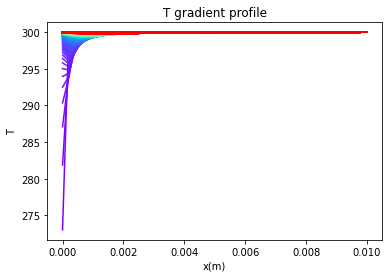

In [390]:

import matplotlib.cm as cm
#Let's graph at every time step to see the evolution of the matrix
colour=iter(cm.rainbow(np.linspace(0,10,nt)))
for item in range(len(results['values'])):
    c=next(colour)
    plt.plot(results['x_points'], results['values'][item], c=c) 
plt.xlabel('x(m)')
plt.ylabel('T')
plt.title("T gradient profile")
plt.show()


#The plot shows the evolution on the gradient temperature for every step dt

DO : show that at equilibrium the thermal gradient is constant.

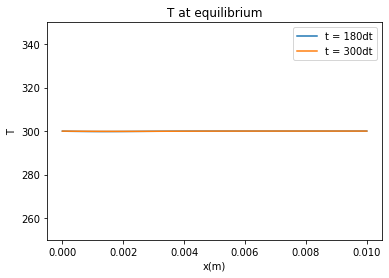

In [391]:
#Let's take the results at t = 180dt and t = 300dt

plt.plot(results['x_points'],results['values'][179], label="t = 180dt")
plt.plot(results['x_points'],results['values'][300], label="t = 300dt")
plt.ylim(250,350)
plt.xlabel('x(m)')
plt.ylabel('T')
plt.legend()
plt.title("T at equilibrium")
plt.show()

#It is clear that the gradient temperature becomes constant at the equilibrium

## Heat flux toward the exterior : energy loss 

At equilibrium what is the heat flux ? 

$F=-D\frac{\partial T}{\partial x}$,

 with D standing for the diffusion coefficient 

F=0 

This is because the temperature is constant everywhere when the system is in equilibrium. 

## Inserting an insulating air-layer

Now we put an insulating layer with air. So our window is like a "sandwich", with 0.3 mm of glass, 0.4 mm of air, 0.3 mm of glass.  Air characteristics are at 273K :
K=0.025 W/m/K , Cp=1005 J/K/Kg, and $\rho= 1.30 Kg/m^3$.

Redo the same exercice as above :

Write the new code (BEWARE : now K, RHO, Cp are not the same evrywhere!!!!)

In [388]:
def calc_D(rho, cp, K):
    return K/(rho*cp)

def T_n_modified(x_interval,T_interval,dx, dt,nt,nx):
    values_matrix = np.ones((nt,nx))
    x_points = np.linspace(x_interval[0],x_interval[1],nx)
    values_matrix[0,0] = T_interval[0]
    values_matrix[0,1:] = T_interval[1]
    values_matrix[:,-1:] = T_interval[1]

    for x in range(nx):
        if x_points[x] > 0.003 and x_points[x]<=0.007:
            values_matrix[0,x] = 273
    
    c_1 = D
    c_2 = calc_D(1.3,1005,0.025)
    c = c_1
    for i in range(nt-1):
        for j in range(nx-1):
            if x_points[j] > 0.003 and x_points[j]<=0.007:
                c = c_2
            else: 
                c = c_1
            values_matrix[i+1,j] = (1-2*c*dt/dx**2)*values_matrix[i,j] + c*dt/dx**2*(values_matrix[i,j-1] + values_matrix[i,j+1])
            
    return {'x_points':x_points, 'values':values_matrix}

dx = 0.8/50
dt = 1 #dt is lentgh  of each time step 

cfl = D*dt/dx**2

print("CFL =", cfl)

results_mod = T_n_modified([0,0.01],[T_L,T_R],dx,dt,nt,nx)

CFL = 0.002075033200531209


What is the effect of the insulating layer ? Show with plots 

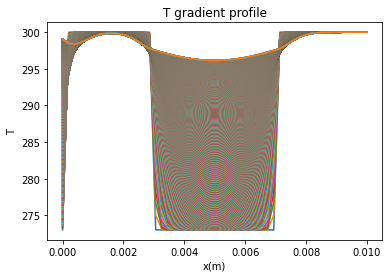

In [392]:
for item in range(len(results_mod['values'])):
    plt.plot(results_mod['x_points'], results_mod['values'][item]) 

plt.xlabel('x(m)')
plt.ylabel('T')
plt.title("T gradient profile")
plt.show()


What is the Thermal profile in the thickness of the window ?


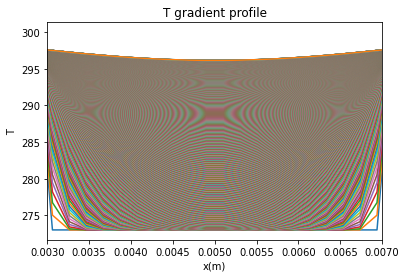

In [394]:
for item in range(len(results_mod['values'])):
    plt.plot(results_mod['x_points'], results_mod['values'][item]) 
plt.xlabel('x(m)')
plt.ylabel('T')
plt.title("T gradient profile")
plt.xlim(0.003, 0.007)
plt.show()


What is the final heat flux ?

Conclusion ? What is the interest of the insulating layer ?


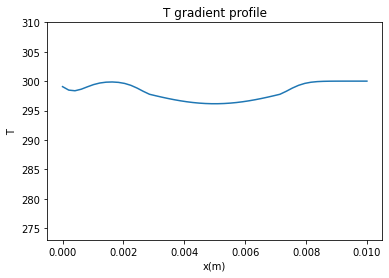

In [400]:
plt.plot(results_mod['x_points'], results_mod['values'][-1]) 
plt.xlabel('x(m)')
plt.ylabel('T')
plt.title("T gradient profile")
plt.ylim(273, 310)
plt.show()

In [ ]:
#The interest to include the insulating layer is to delay heat diffussion to the exterior of the window. 
#Instead of reaching the equilibrium we observe that at similar time scales the termal profile doesn't become constant, so the diffussion is slower
#When introducing the new layer. 